#**Práctica 4 Analítica de datos**
##**Modelo de predicción**

Por:
* Juan Felipe Ramírez Castañeda
* Aura Marcela Arbeláez Aristizábal

##Descripción:
En el presente cuaderno, se realizarán dos modelos predictivos para el set de datos "Sleep Health and lifestyle Data set", con el fin de determinar cuales personas son propensas a desarrollar desordenes del sueño según sus hábitos de vida.
Para lograarlos, se utilizarán 5 métodos de predicción, el primero se denomina "Vecinos más cercanos" o KNN.


##**1. Módelo KNN**

**Pasos:**

* Carga de librerías
* Carga de datos
* Preparación de datos
* División de datos
* Entrenamiento con KNN
* Evaluación del modelo

1. Cargar librerías

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


2. Cargar los datos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('/content/datos_preparados.csv')

# Visualizar las primeras filas
df.head()


,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Diastolic Blood Presure,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,42,Overweight,77,83,4200,NaN
1,Male,28,Doctor,6.2,60,Normal,75,80,10000,NaN
2,Male,28,Doctor,6.2,60,Normal,75,80,10000,NaN
3,Male,28,Nurse,5.9,30,Obese,85,90,3000,Sleep Apnea
4,Male,28,Nurse,5.9,30,Obese,85,90,3000,Sleep Apnea


3. Preparación de datos

In [ ]:
# Verificar nulos
df.isnull().sum()


,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Physical Activity Level,0
BMI Category,0
Heart Rate,0
Diastolic Blood Presure,0
Daily Steps,0
Sleep Disorder,219


In [ ]:
# Reemplazar valores faltantes en 'Sleep Disorder' por la palabra 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')


In [ ]:
# Verificar nulos
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Physical Activity Level,0
BMI Category,0
Heart Rate,0
Diastolic Blood Presure,0
Daily Steps,0
Sleep Disorder,0


In [ ]:
# Tipos de datos
df.dtypes


,0
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Physical Activity Level,int64
BMI Category,object
Heart Rate,int64
Diastolic Blood Presure,int64
Daily Steps,int64
Sleep Disorder,object


4. División de datos

In [ ]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [ ]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Confirmación (puedes imprimir para revisar)
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

# Preprocesador: escalar numéricas y codificar categóricas
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


Numéricas: ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Diastolic Blood Presure', 'Daily Steps']
Categóricas: ['Gender', 'Occupation', 'BMI Category']


In [ ]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(X_encoded.head())

   Age  Sleep Duration  Physical Activity Level  Heart Rate  \
0   27             6.1                       42          77   
1   28             6.2                       60          75   
2   28             6.2                       60          75   
3   28             5.9                       30          85   
4   28             5.9                       30          85   

   Diastolic Blood Presure  Daily Steps  Gender_Male  Occupation_Doctor  \
0                       83         4200         True              False   
1                       80        10000         True               True   
2                       80        10000         True               True   
3                       90         3000         True              False   
4                       90         3000         True              False   

   Occupation_Engineer  Occupation_Lawyer  Occupation_Manager  \
0                False              False               False   
1                False              Fals

5. Normalización de datos

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

6. Entrenamiento del modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)


KNeighborsClassifier()

7. Evaluar el modelo

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test_processed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Insomnia       0.75      0.88      0.81        24
        None       0.92      0.97      0.94        62
 Sleep Apnea       0.95      0.70      0.81        27

    accuracy                           0.88       113
   macro avg       0.87      0.85      0.85       113
weighted avg       0.89      0.88      0.88       113



**Puntos adicionales**

Para visualizar el modelo, utilizaremos 3 métodos:
1. Matriz de confusión


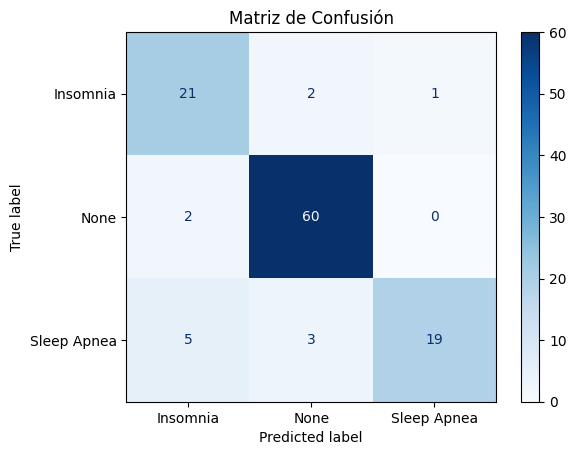

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = knn.predict(X_test_processed)  # Asegúrate de tener tus datos ya preprocesados
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


2. Curva de presicoión vs Número de vecinos

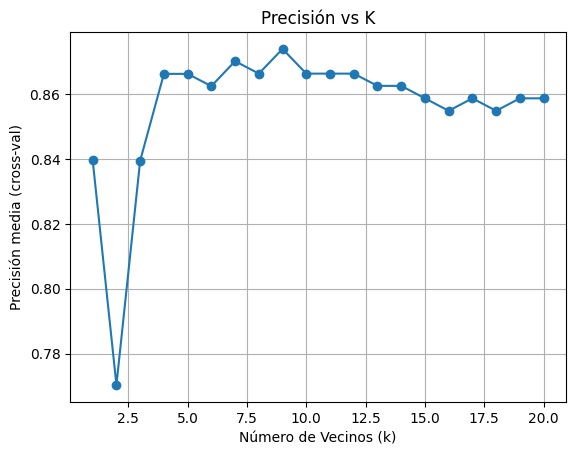

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_processed, y_train, cv=5)
    accuracies.append(scores.mean())

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión media (cross-val)')
plt.title('Precisión vs K')
plt.grid(True)
plt.show()


3. Visualización 2D con PCA o TSNE (reducción de dimensiones)

Esto te permite ver cómo se distribuyen las clases en un espacio reducido

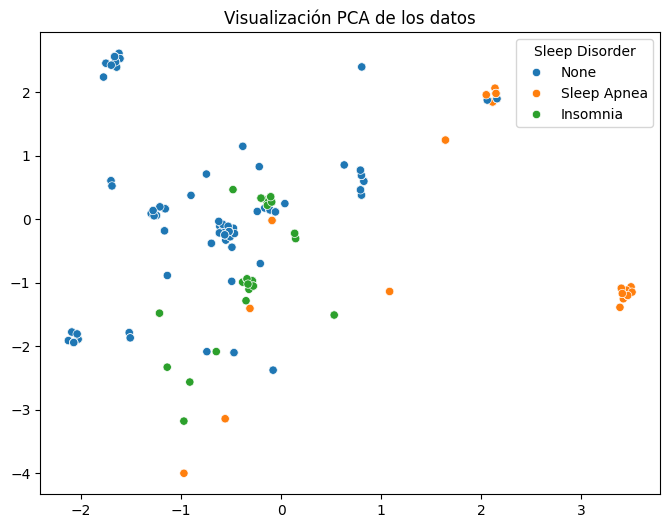

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_processed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train)
plt.title('Visualización PCA de los datos')
plt.show()


#**2. Red neuronal**
* Se entrena una red neuronal multicapa con MLPClassifier.
* Arquitectura por defecto: 1 capa oculta de 100 neuronas, activación ReLU, optimizador Adam.
* Se evalúa el desempeño sobre el conjunto de prueba.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## 1. Reemplazar nulos en la variable objetivo


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

## 2. Separar X e y


In [ ]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

## 3. Codificación one-hot para variables categóricas


In [ ]:
X_encoded = pd.get_dummies(X)

## 4. Escalar variables numéricas


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## 5. División de los datos


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 6. Crear y entrenar red neuronal


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

## 7. Predicción y evaluación


In [ ]:
y_pred = mlp.predict(X_test)
print("📊 Reporte de Clasificación - MLP:")
print(classification_report(y_test, y_pred))

📊 Reporte de Clasificación - MLP:
              precision    recall  f1-score   support

    Insomnia       0.82      0.88      0.85        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.93      0.81      0.87        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75



## 8. Matriz de confusión


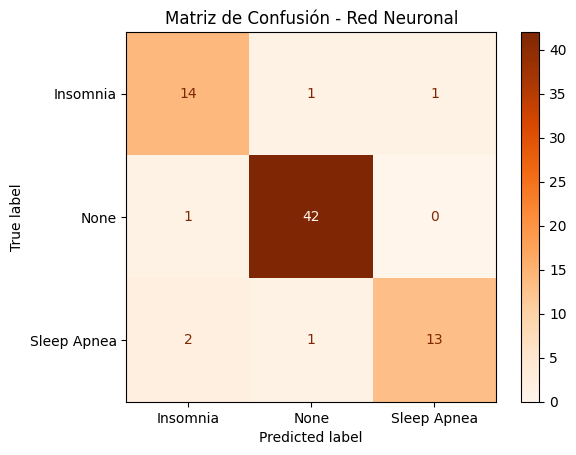

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Oranges')
plt.title('Matriz de Confusión - Red Neuronal')
plt.show()

#**2. Máquina de soporte vectorial**
* Se entrena un modelo SVC con kernel RBF.
* Se evalúa la precisión en clasificación multiclase.
* Se muestra la matriz de confusión correspondiente.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## 1. Rellenar valores nulos en la variable objetivo


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

## 2. Separar variables predictoras y objetivo


In [ ]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

## 3. Codificar variables categóricas con One-Hot Encoding


In [ ]:
X_encoded = pd.get_dummies(X)

## 4. Escalar las variables numéricas


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

## 5. Dividir en entrenamiento y prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 6. Crear y entrenar el modelo SVM


In [ ]:
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

## 7. Evaluación del modelo


In [ ]:
y_pred = svm_clf.predict(X_test)

print("📊 Reporte de Clasificación - SVM:")
print(classification_report(y_test, y_pred))

📊 Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

    Insomnia       0.68      0.81      0.74        16
        None       0.93      0.95      0.94        43
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.87        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.88      0.87      0.87        75



## 8. Matriz de confusión


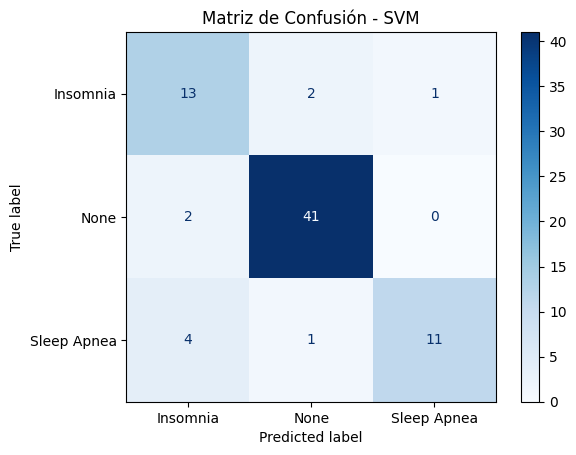

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=svm_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - SVM')
plt.show()


Exportar los .pkl

#**3. Árbol de decisión**

* Se entrena un DecisionTreeClassifier con una profundidad máxima definida.
* Se visualiza el árbol generado con plot_tree.
* Se muestra la matriz de confusión y reporte de métricas.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd


## 1. Reemplazar nulos en la variable objetivo

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

### 2. Separar X e y


In [ ]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']


##3. Codificación one-hot para variables categóricas


In [ ]:
X_encoded = pd.get_dummies(X)

## 4. Escalar variables numéricas


## 5. Dividir en entrenamiento y prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## 6. Crear y entrenar el modelo


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # puedes ajustar max_depth
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## 7. Evaluar


In [ ]:
y_pred = tree_clf.predict(X_test)

print("📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

    Insomnia       0.67      0.88      0.76        16
        None       0.95      0.95      0.95        43
 Sleep Apnea       0.91      0.62      0.74        16

    accuracy                           0.87        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.88      0.87      0.87        75



## 8. Matriz de confusión


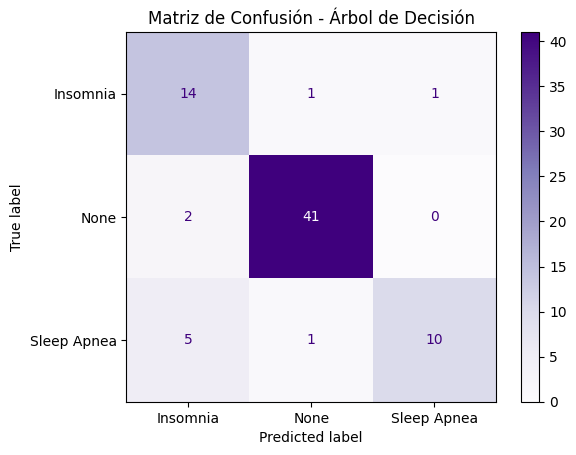

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(cmap='Purples')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

#**4. Modelo con Random Forest**

**Pasos:**
* Preparación de datos
* División de datos
* Entrenamiento del modelo
* Evaluación del modelo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd


1. Preparación de datos

In [ ]:
# 1. Rellenar nulos con 'None' si no lo hiciste ya
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [ ]:
# 2. Separar variables independientes y dependiente
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [ ]:
# 3. Codificar variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

2. División de datos

In [ ]:
# 1. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

3. Entrenamiento del modelo

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

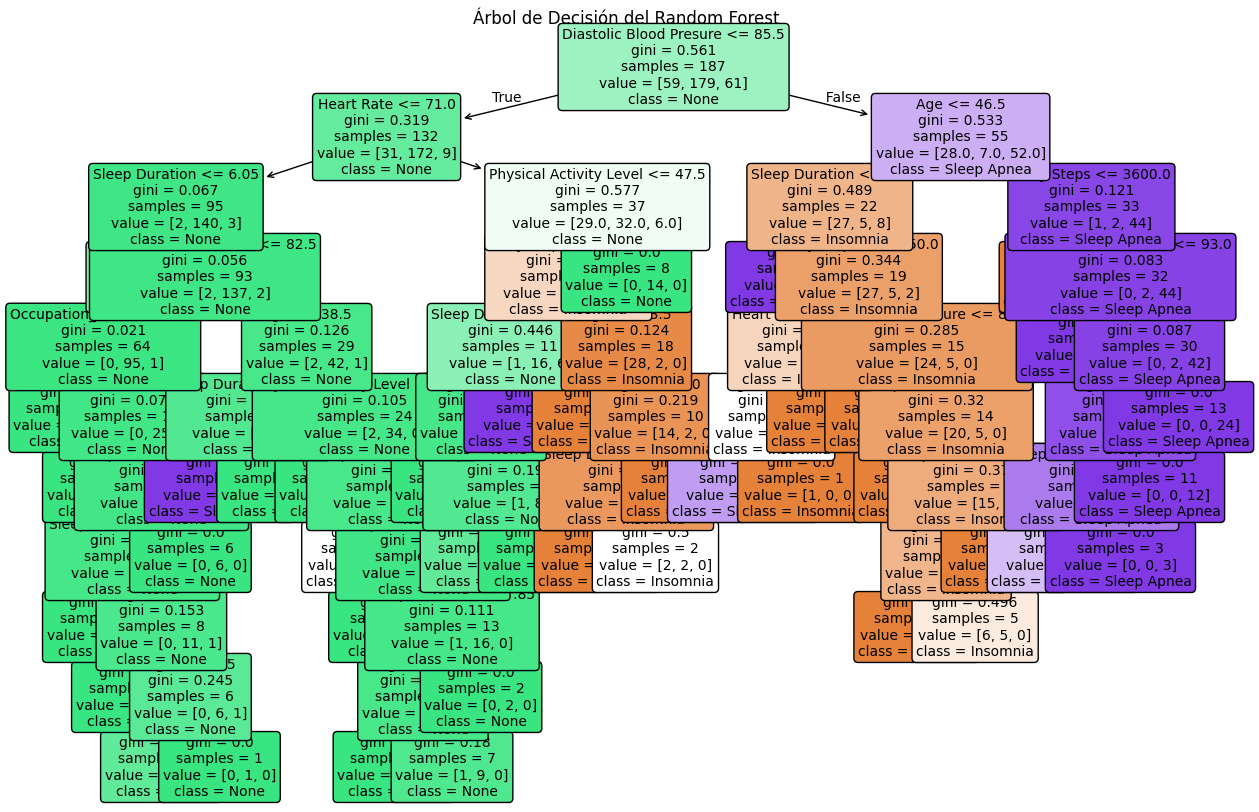

In [ ]:
# Graficar el árbol de decisión del Random Forest
tree_to_plot = rf.estimators_[0]  # Seleccionar el primer árbol del bosque aleatorio
plt.figure(figsize=(15,10))
plot_tree(tree_to_plot, feature_names=X_train.columns.values,
          class_names=LabelEncoder().fit(y).classes_, rounded=True, filled=True, fontsize=10)
plt.title('Árbol de Decisión del Random Forest')
plt.show()


4. Evaluación del modelo

In [ ]:
# 1. Predicciones y evaluación
y_pred = rf.predict(X_test)
print("Classification Report del Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report del Random Forest:
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



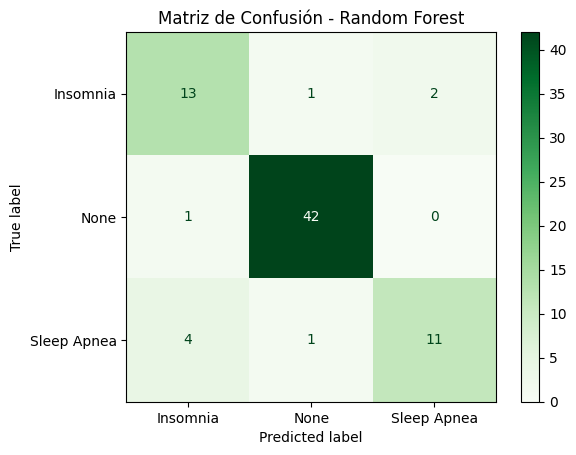

In [ ]:
# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

#**5. Hiperparametrización de Random Forest**
**Pasos:**
1. Definir la grilla de hiperparámetros
2. Configurar la búsqueda en grilla
3. Entrenar la búsqueda
4. Ver los mejores hiperparámetros encontrados
5. Usar el mejor modelo
6. Evaluar el modelo en test
7. Matriz de confusión







##1. Definir la grilla de hiperparámetros


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir la grilla de hiperparámetros
criterion=['entropy','gini'] #Indice de información
min_samples_leaf=[2,10,50,100] # Cantidad de registros por hoja
max_depth=[None, 10,20,50] #Niveles de profundidad

##2. Configurar la búsqueda en grilla


In [ ]:
param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    n_jobs=-1,
    cv=3,              # Validación cruzada 5-fold
    verbose=2
)

##3. Entrenar la búsqueda


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 50],
                         'min_samples_leaf': [2, 10, 50, 100]},
             scoring='f1_macro', verbose=2)

##4. Ver los mejores hiperparámetros encontrados


In [ ]:
print("✅ Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
# Changed 'grid' to 'grid_search' to access the best_score_ attribute
medidas['Tree']=grid_search.best_score_


✅ Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}


##5. Usar el mejor modelo


In [ ]:
best_rf = grid_search.best_estimator_

Graficar el árbol

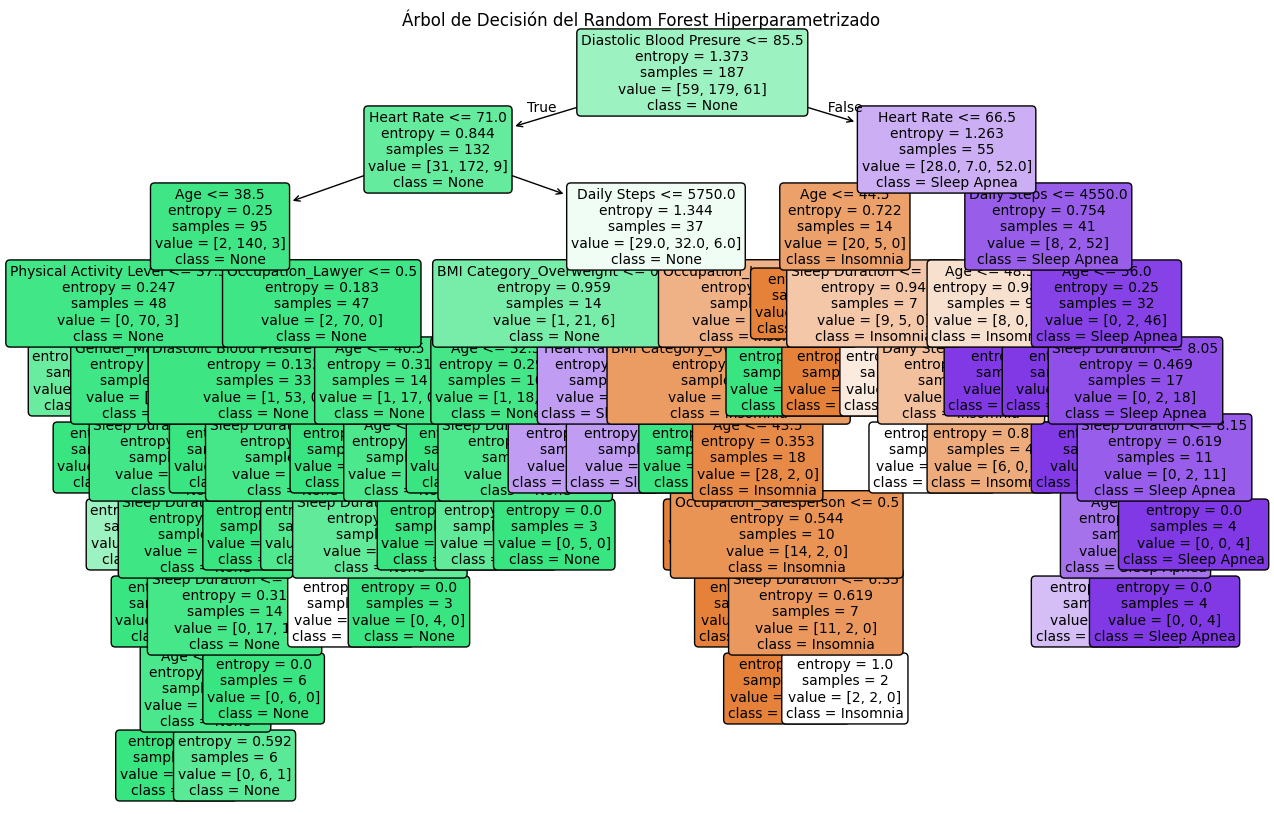

In [ ]:
tree_to_plot = best_rf.estimators_[0]
plt.figure(figsize=(15,10))
plot_tree(tree_to_plot, feature_names=X_train.columns.values,
          class_names=LabelEncoder().fit(y).classes_, rounded=True, filled=True, fontsize=10)
plt.title('Árbol de Decisión del Random Forest Hiperparametrizado')
plt.show()

##6. Evaluar el modelo en test


In [ ]:
y_pred = best_rf.predict(X_test)
print("\n📊 Reporte de Clasificación (modelo óptimo):")
print(classification_report(y_test, y_pred))


📊 Reporte de Clasificación (modelo óptimo):
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



##7. Matriz de confusión

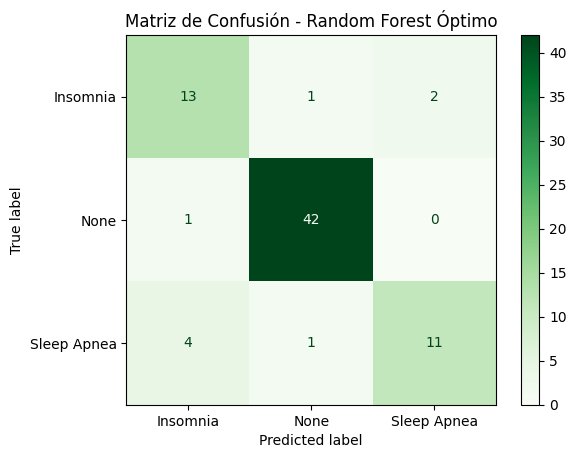

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Greens')
plt.title('Matriz de Confusión - Random Forest Óptimo')
plt.show()

In [ ]:
print(y_train.unique())  # Para ver las etiquetas únicas en y_train
print(y_train.value_counts())  # Para contar las ocurrencias de cada clase


['Insomnia' 'None' 'Sleep Apnea']
Sleep Disorder
None           176
Sleep Apnea     62
Insomnia        61
Name: count, dtype: int64


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Ajuste y transformación
print(label_encoder.classes_)  # Verifica las clases codificadas


['Insomnia' 'None' 'Sleep Apnea']


In [ ]:
print(X_encoded.columns)  # Mostrar las columnas del DataFrame codificado


Index(['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate',
       'Diastolic Blood Presure', 'Daily Steps', 'Gender_Male',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')


In [ ]:
print(len(X_encoded), len(y))  # Verificar que las longitudes coincidan


374 374


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Asegúrate de que el 'scaler' esté definido correctamente
scaler = StandardScaler()

# Aquí es donde deberías escalar tus datos
# X_train_scaled = scaler.fit_transform(X_train)  # Si has escalado X_train

# Guardar el modelo entrenado, variables, scaler y label_encoder en un archivo .pkl
modelos_guardar = {
    'modelo_random_forest.pkl': rf,  # Modelo sin hiperparametrizar
    'modelo_random_forest_hiper.pkl': best_rf,  # Modelo hiperparametrizado
}

# Guardar los modelos y otros elementos necesarios
for nombre_archivo, modelo in modelos_guardar.items():
    with open(nombre_archivo, 'wb') as f:
        pickle.dump([modelo, X_train.columns.values, LabelEncoder(), scaler], f)  # Guardando también el label_encoder
    print(f"{nombre_archivo} guardado correctamente.")


modelo_random_forest.pkl guardado correctamente.
modelo_random_forest_hiper.pkl guardado correctamente.
